I am analyzing twitter data based on the sector. I have chosen JPM Chase for financial sector, Apple for technological sector and Pfizer from healthcare sector.
I  have used a dataset from kaggle to analyze sentiment for Apple.
I need to create a dataframe for JPM and Pfizer tweets:

In [14]:
!pip install tweepy

In [15]:
!pip install textblob

In [16]:
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
import json

In [17]:
log1 = pd.read_csv('login.csv')

In [18]:
ckey=log1['Key'][0]
cs=log1['Key'][1]
at = log1['Key'][2]
ats = log1['Key'][3]

In [19]:
#create the twitter authentication
aunthenticate = tweepy.OAuthHandler(ckey,cs)
aunthenticate.set_access_token(at,ats)
api = tweepy.API(aunthenticate,wait_on_rate_limit=True)

In [35]:
# Define the search term and the date_since date as variables to search for specific compabies in specific sector
# We will start with aapl first
search_words = "JPM"
date_since = "2018-11-16"

In [50]:
tweetsfi = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items()
tweetsfi

In [51]:
# Collect tweets
tweetsfi = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

# Iterate and print tweets
for tweet in tweetsfi:
    print(tweet.text)
    

RT @lhamtil: Periodic reminder JPM publishes guides to other markets such as Europe, and they often have some cool charts you don't see in…
@cwnprotector make a gmail while having jpm vpn on then log in that gmail to the play store... make sure you still have the vpn on though
@MatthewCappucci Done with grace &amp; style... personally, I'd likely trip and shoot off the treadmill. 🤷🏻‍♂️
@NycStormChaser @StormTeam4NY @nazlizeynepn @WeatherGoinWILD @jhuntington @nymetrowx @News12BK @nynjpaweather… https://t.co/C3KNPf1ota
RT @NycStormChaser: What an amazing lightning show this evening in New York City tonight. Some of the best I've captured here. #NyWx https:…
RT @tuesday_js25: @ owhat so we all buy 130+ albums for fansign and still cant win the lottery ???
Damn! That alley oop pass from holiday to giannis was insane! 🔥
RT @DavidWalshXRP: @SmeagolsT @GaryGensIer Why would BoA want to use JPM coin? Think about it. If I owned a bank why the hell would I want…
RT @RRubicante: Did I go back an

In [52]:
# Collect tweets
tweetsfi = tweepy.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(150)

# Collect a list of tweets
[tweet.text for tweet in tweetsfi]

["RT @lhamtil: Periodic reminder JPM publishes guides to other markets such as Europe, and they often have some cool charts you don't see in…",
 '@cwnprotector make a gmail while having jpm vpn on then log in that gmail to the play store... make sure you still have the vpn on though',
 "@MatthewCappucci Done with grace &amp; style... personally, I'd likely trip and shoot off the treadmill. 🤷🏻\u200d♂️",
 '@NycStormChaser @StormTeam4NY @nazlizeynepn @WeatherGoinWILD @jhuntington @nymetrowx @News12BK @nynjpaweather… https://t.co/C3KNPf1ota',
 "RT @NycStormChaser: What an amazing lightning show this evening in New York City tonight. Some of the best I've captured here. #NyWx https:…",
 'RT @tuesday_js25: @ owhat so we all buy 130+ albums for fansign and still cant win the lottery ???',
 'Damn! That alley oop pass from holiday to giannis was insane! 🔥',
 'RT @DavidWalshXRP: @SmeagolsT @GaryGensIer Why would BoA want to use JPM coin? Think about it. If I owned a bank why the hell would I wan

In [40]:
json_data = [r._json for r in tweets]

df = pd.json_normalize(json_data)

In [41]:
df.head()

""


Focusing on tech companies to analyze sentiment and stck price

In [42]:
import seaborn as sns
from scipy import stats as stat

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [44]:
company_tweets = pd.read_csv("company_tweet.csv")
tweet = pd.read_csv("tweet.csv")

In [45]:
tweets = pd.merge(company_tweets, tweet, on='tweet_id', how='inner')

In [46]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [47]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [48]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [49]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [53]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   ticker_symbol  object        
 2   writer         object        
 3   post_date      datetime64[ns]
 4   body           object        
 5   comment_num    int64         
 6   retweet_num    int64         
 7   like_num       int64         
 8   date           datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 330.8+ MB


In [54]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [55]:
tweets.isna().sum()

ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
date                 0
dtype: int64

In [56]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [57]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [58]:
!pip install yfinance

In [59]:
import yfinance as yf

In [60]:
aapl_stock = yf.Ticker('AAPL')

In [61]:
start = min(aapl['date'])
end = max(aapl['date'])

aapl_stock = aapl_stock.history(start=start.date(), end=end.date())

In [62]:
aapl_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,25.286885,25.298236,24.369756,24.819241,212818400,0.0,0
2015-01-05,24.583150,24.664874,23.929355,24.120045,257142000,0.0,0
2015-01-06,24.185883,24.387924,23.752289,24.122320,263188400,0.0,0
2015-01-07,24.335706,24.562718,24.222200,24.460564,160423600,0.0,0
2015-01-08,24.796547,25.459422,24.676229,25.400398,237458000,0.0,0
...,...,...,...,...,...,...,...
2019-12-23,69.310552,70.229652,69.271019,70.167885,98572000,0.0,0
2019-12-24,70.338354,70.387771,69.901043,70.234581,48478800,0.0,0
2019-12-26,70.370482,71.645364,70.340834,71.628067,93121200,0.0,0


In [63]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())

I would like to find out if the amount of tweets affects the volume traded of the particular company. 

In [64]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


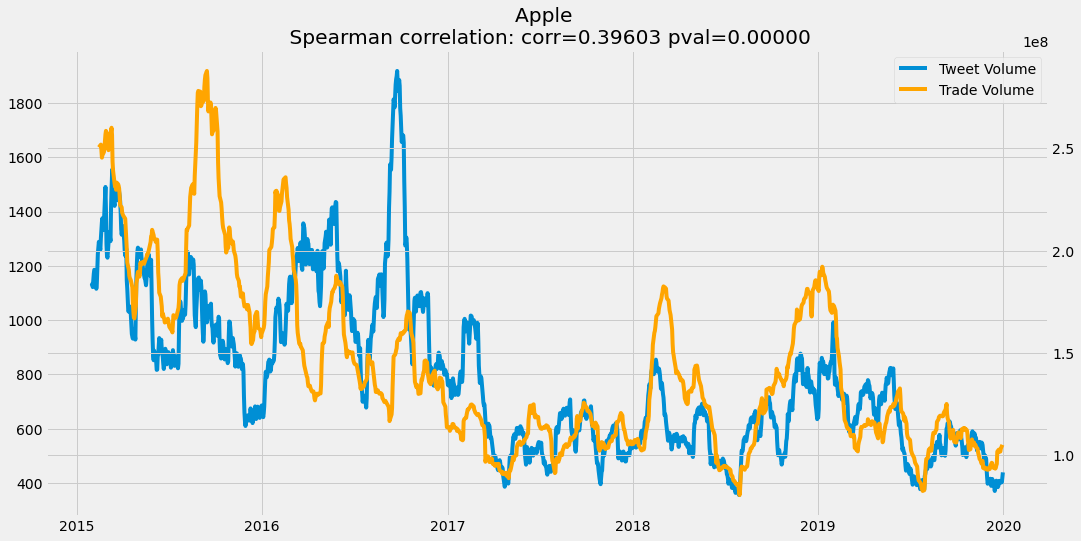

In [65]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

Looking at it, it appears that the shear volume of tweets does seems to have a positive correlation with the trade volume. However, the strength of the correlation is questionable. 

Classifying Positive and negative tweets

In [66]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=b6f3533c771c5959e1fe1bd4b91489c71ac20152d988167d13f3b0e015474dc8
  Stored in directory: c:\users\malia\appdata\local\pip\cache\wheels\9d\16\3a\9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [67]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))